<a href="https://colab.research.google.com/github/wakkihaya/mne-oscillation-classifier/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MNEのサンプルデータから、P300 Classifierを作成する。
!pip install mne
import os
import numpy as np
import mne

     |████████████████████████████████| 7.0MB 6.1MB/s 


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


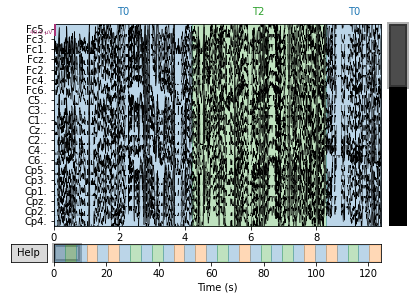

AttributeError: ignored

In [75]:
subject = 1
runs = [3]
tmin = -0.1
tmax = 0.3
raw_fnames = mne.datasets.eegbci.load_data(subject,runs)
raw_files = [mne.io.read_raw_edf(f, preload=True) for f in raw_fnames]
raw = mne.io.concatenate_raws(raw_files)
raw.plot()

In [74]:
events, _ = mne.events_from_annotations(raw)
print(events.shape)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

Used Annotations descriptions: ['T0', 'T1', 'T2']
(30, 3)


Not setting metadata
Not setting metadata
15 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 15 events and 65 original time points ...
1 bad epochs dropped


<ipython-input-64-57172a3c7d84>:3: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  epochs_train=epochs.copy().crop(tmin=-0.2,tmax=0.5)
<ipython-input-64-57172a3c7d84>:3: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_train=epochs.copy().crop(tmin=-0.2,tmax=0.5)


    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-64-57172a3c7d84>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd()


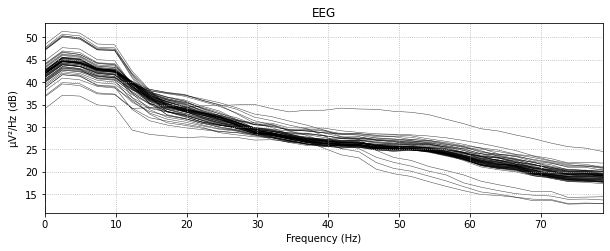

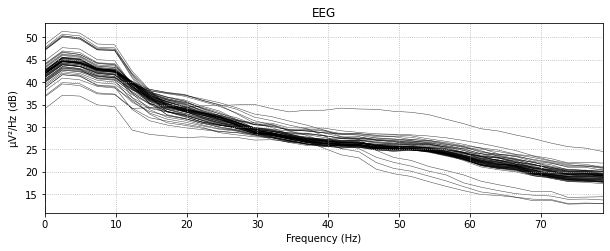

In [64]:
event_id=1
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, preload=True)
epochs_train=epochs.copy().crop(tmin=-0.2,tmax=0.5)
labels = epochs.events[:, -1] - 2
epochs.plot_psd()

In [82]:
# TODO:// Epoch data をalpha, beta 表示する

epochs_data = epochs.get_data()
epochs_train_data = epochs_train.get_data()
samp_rate=160 # sampling rate TODO:

n_epochs = epochs_data.shape[0]
n_channels = epochs_data.shape[1]
n_samples = epochs_data.shape[2]


In [ ]:

def nextpow2(i):
    """
    Find the next power of 2 for number i
    """
    n = 1
    while n < i:
        n *= 2
    return n

def compute_feature_extraction(eegdata):

  # Apply Hamming window
    w = np.hamming(n_samples)
    dataWinCentered = eegdata - np.mean(eegdata, axis=0)  # Remove offset
    dataWinCenteredHam = (dataWinCentered.T*w).T

  #TODO: fft の計算の仕方を見る
    NFFT = nextpow2(n_samples)
    Y = np.fft.fft(dataWinCenteredHam, n=NFFT, axis=0)/n_samples
    PSD = 2*np.abs(Y[0:int(NFFT/2), :])
    f = fs/2*np.linspace(0, 1, int(NFFT/2))

In [ ]:

for i_epoch in range(n_epochs):
